In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Optional
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [ ]:
# Load Files as DataFrames
BASE_DIR = Path.cwd().resolve().parents[1]
data_file_1 = BASE_DIR / "data" / "raw" / "ks-projects-201612.csv"
data_file_2 = BASE_DIR / "data" / "raw" / "ks-projects-201801.csv"

filepath_1 = Path(data_file_1)
filepath_2 = Path(data_file_2)

df1 = pd.read_csv(filepath_1, encoding='latin-1', low_memory=False)
df2 = pd.read_csv(filepath_2, low_memory=False)

logger.info(f"Loaded {len(df1)} rows and {len(df1.columns)} columns")
logger.info(f"Loaded {len(df2)} rows and {len(df2.columns)} columns")

INFO:__main__:Loaded 370454 rows and 11 columns
INFO:__main__:Loaded 331675 rows and 11 columns


In [6]:
# delete spaces from column names
df1.columns = df1.columns.str.strip().str.replace(' ', '_').str.lower()
df2.columns = df2.columns.str.strip().str.replace(' ', '_').str.lower()

In [7]:
print(list(df1.columns))
print(list(df2.columns))

['id', 'main_category', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'duration_days', 'target']
['id', 'main_category', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'duration_days', 'target']


In [8]:
print(f"Shape of data 1: {df1.shape}")
print(f"Shape of data 2: {df2.shape}")


Shape of data 1: (370454, 11)
Shape of data 2: (331675, 11)


In [9]:
print(f"Data Types of data 1: \n{df1.dtypes}")

Data Types of data 1: 
id                    int64
main_category        object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
duration_days         int64
target                int64
dtype: object


In [10]:
print(f"Data Types of data 2: \n{df2.dtypes}")

Data Types of data 2: 
id                    int64
main_category        object
deadline             object
launched             object
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
duration_days         int64
target                int64
dtype: object


In [11]:
print(f"Null Amount of data 1: \n{df1.isnull().sum()}")

Null Amount of data 1: 
id                  0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
duration_days       0
target              0
dtype: int64


In [12]:
print(f"Null Amount of data 2: \n{df2.isnull().sum()}")

Null Amount of data 2: 
id                  0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
duration_days       0
target              0
dtype: int64


In [13]:
print(f"Percent of Null Amount of data 1: \n{(df1.isnull().sum() / len(df1) * 100).round(4)}")

Percent of Null Amount of data 1: 
id                  0.0
main_category       0.0
deadline            0.0
launched            0.0
state               0.0
backers             0.0
country             0.0
usd_pledged_real    0.0
usd_goal_real       0.0
duration_days       0.0
target              0.0
dtype: float64


In [14]:
print(f"Percent of Null Amount of data 2: \n{(df2.isnull().sum() / len(df2) * 100).round(4)}")


Percent of Null Amount of data 2: 
id                  0.0
main_category       0.0
deadline            0.0
launched            0.0
state               0.0
backers             0.0
country             0.0
usd_pledged_real    0.0
usd_goal_real       0.0
duration_days       0.0
target              0.0
dtype: float64


In [15]:
# Check sizes
print(f"Dataset 1: {df1.shape}")
print(f"Dataset 2: {df2.shape}")

# Check unique IDs
common_ids = set(df2['id']).intersection(set(df1['id']))
print(f"Common IDs: {len(common_ids)}")
print(f"Unique IDs in df1: {len(df1) - len(common_ids)}")
print(f"Unique IDs in df2: {len(df2) - len(common_ids)}")

Dataset 1: (370454, 11)
Dataset 2: (331675, 11)
Common IDs: 331675
Unique IDs in df1: 38779
Unique IDs in df2: 0


In [ ]:
# TAKE DATA from df2!!!

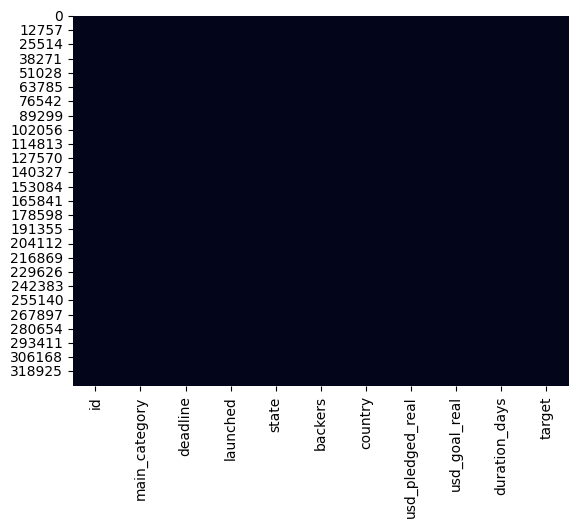

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df2.isna(), cbar=False)
plt.show()

In [17]:
# replace missing names with 'unknown'
df2["name"] = df2["name"].fillna("unknown")
print(f"Null Amount of data 2: \n{df2.isnull().sum()}")

KeyError: 'name'

In [ ]:
# usd_pledged is not reliable , because we have usd_pledged_real
# drop usd_pledged
df2 = df2.drop(columns=["usd_pledged"])

In [18]:
# check duplicates in IDs
df2["id"].duplicated().sum()

0

In [50]:
df2.launched.head(10)

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
5    2016-02-26 13:38:27
6    2014-12-01 18:30:44
7    2016-02-01 20:05:12
8    2014-04-24 18:14:43
9    2014-07-11 21:55:48
Name: launched, dtype: object

In [20]:
df2.deadline.head(10)

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2016-04-01
5    2014-12-21
6    2016-03-17
7    2013-10-09
8    2013-04-08
9    2014-10-02
Name: deadline, dtype: object

In [19]:
df1.deadline.head(10)

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
5    2016-04-01
6    2014-12-21
7    2016-03-17
8    2014-05-29
9    2014-08-10
Name: deadline, dtype: object

In [21]:
# deadline, launched - should be datetime types
df2["launched"] = pd.to_datetime(df2["launched"], errors="coerce")
df2["deadline"] = pd.to_datetime(df2["deadline"], errors="coerce")

df2[["launched", "deadline"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   launched  331675 non-null  datetime64[ns]
 1   deadline  331675 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.1 MB


In [22]:
df2.deadline.head(10)

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
5   2016-04-01
6   2014-12-21
7   2016-03-17
8   2014-05-29
9   2014-08-10
Name: deadline, dtype: datetime64[ns]

In [23]:
df2.launched.head(10)

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
5   2016-02-26 13:38:27
6   2014-12-01 18:30:44
7   2016-02-01 20:05:12
8   2014-04-24 18:14:43
9   2014-07-11 21:55:48
Name: launched, dtype: datetime64[ns]

In [24]:
# maybe add duration as a new column to see how long did the kickstarter took
df2["kickstarter_duration_days"] = (
    df2["deadline"] - df2["launched"]
).dt.days

df2["kickstarter_duration_days"].describe()

count    378661.000000
mean         33.481122
std          65.909172
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max       16738.000000
Name: kickstarter_duration_days, dtype: float64

In [ ]:
df2["state"].value_counts()

state
failed        197719
successful    133956
Name: count, dtype: int64

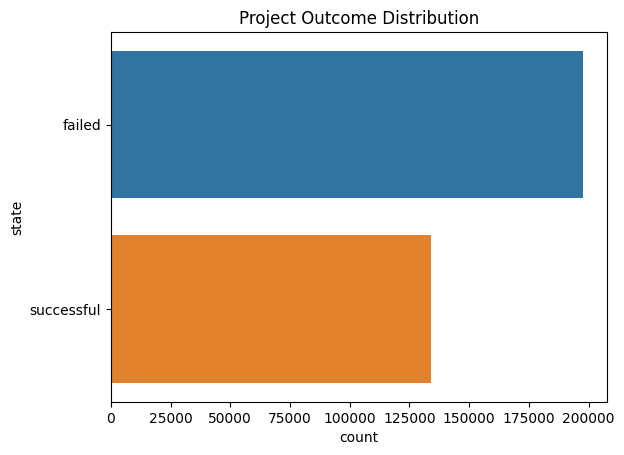

In [26]:
sns.countplot(y="state", data=df2)
plt.title("Project Outcome Distribution")
plt.show()

In [27]:
num_cols = [
    "goal",
    "usd_goal_real",
    "pledged",
    "usd_pledged_real",
    "backers",
    "kickstarter_duration_days",
]

df2[num_cols].describe()

,goal,usd_goal_real,pledged,usd_pledged_real,backers,kickstarter_duration_days
count,3.786610e+05,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000
mean,4.908079e+04,4.545440e+04,9.682979e+03,9.058924e+03,105.617476,33.481122
std,1.183391e+06,1.152950e+06,9.563601e+04,9.097334e+04,907.185035,65.909172
min,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.000000e+03,2.000000e+03,3.000000e+01,3.100000e+01,2.000000,29.000000
50%,5.200000e+03,5.500000e+03,6.200000e+02,6.243300e+02,12.000000,29.000000
75%,1.600000e+04,1.550000e+04,4.076000e+03,4.050000e+03,56.000000,36.000000
max,1.000000e+08,1.663614e+08,2.033899e+07,2.033899e+07,219382.000000,16738.000000


In [28]:
df2.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

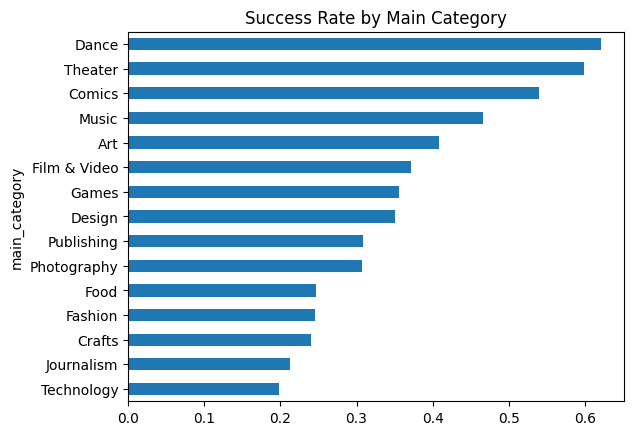

In [29]:
success_rate = (
    df2.assign(success=df2["state"] == "successful")
      .groupby("main_category")["success"]
      .mean()
      .sort_values()
)

success_rate.plot(kind="barh")
plt.title("Success Rate by Main Category")
plt.show()

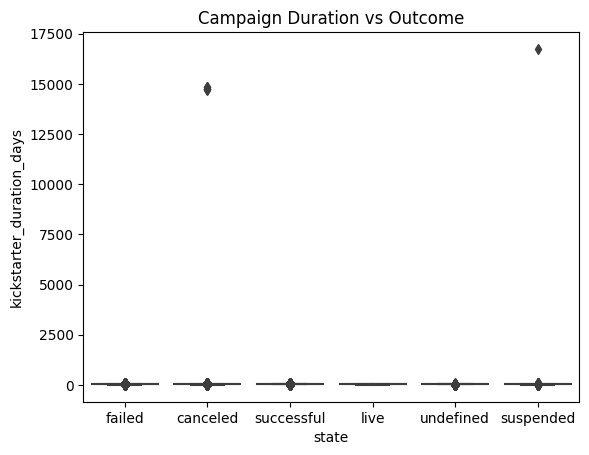

In [30]:
sns.boxplot(
    x="state",
    y="kickstarter_duration_days",
    data=df2
)
plt.title("Campaign Duration vs Outcome")
plt.show()

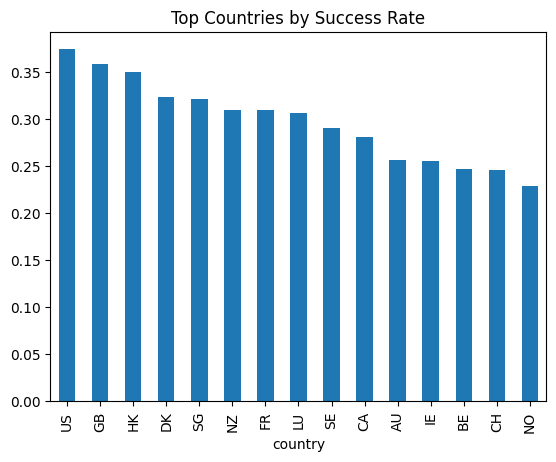

In [31]:
country_success = (
    df2.assign(success=df2["state"] == "successful")
      .groupby("country")["success"]
      .mean()
      .sort_values(ascending=False)
)

country_success.head(15).plot(kind="bar")
plt.title("Top Countries by Success Rate")
plt.show()

In [32]:
numerical_df = df2.select_dtypes(include=['number'])

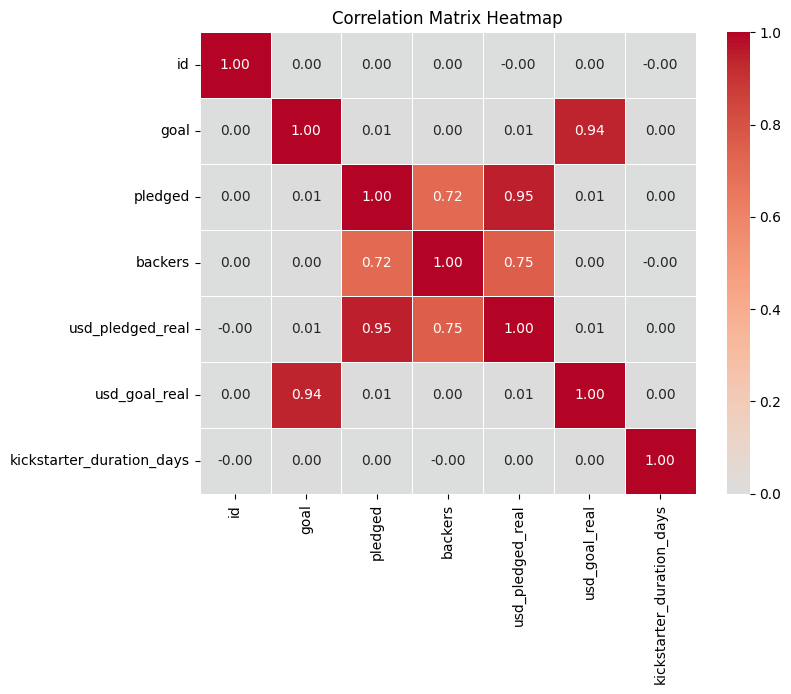

In [33]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6)) # Set the size of the plot

sns.heatmap(
    correlation_matrix,
    annot=True,     # Show the correlation values on the heatmap
    cmap='coolwarm',# Choose a divergent color palette (blue for negative, red for positive)
    fmt=".2f",      # Format the annotation values to two decimal places
    linewidths=.5,  # Add lines between cells for clarity
    center=0        # Ensure the color scale is centered at 0 (no correlation)
)

plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\pered\AppData\Local\Temp\ipykernel_325308\1469127840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_fail_df['is_successful'] = np.where(success_fail_df['state'] == 'successful', 1, 0)


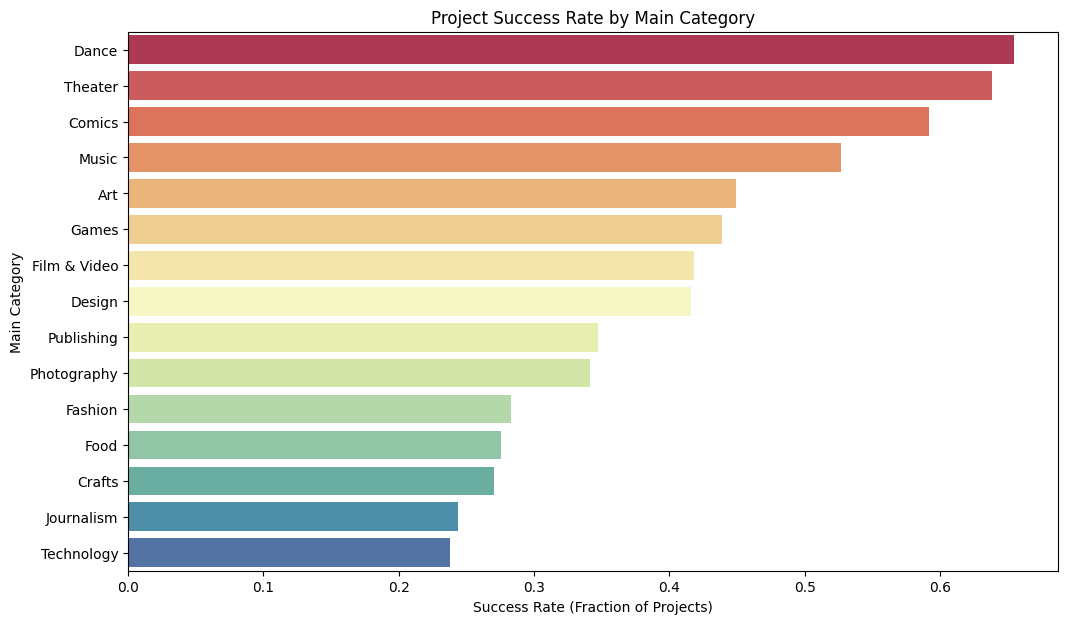

In [ ]:
# Filter for only 'successful' and 'failed' states for this analysis (optional but common)
success_fail_df = df2[df2['state'].isin(['successful', 'failed'])]

# Create a new binary column: 1 if successful, 0 otherwise
success_fail_df['is_successful'] = np.where(success_fail_df['state'] == 'successful', 1, 0)

# Calculate the mean success rate per category
category_success_rate = success_fail_df.groupby('main_category')['is_successful'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(
    x='is_successful',
    y='main_category',
    data=category_success_rate,
    palette='Spectral'
)
plt.title('Project Success Rate by Main Category')
plt.xlabel('Success Rate (Fraction of Projects)')
plt.ylabel('Main Category')
plt.show()

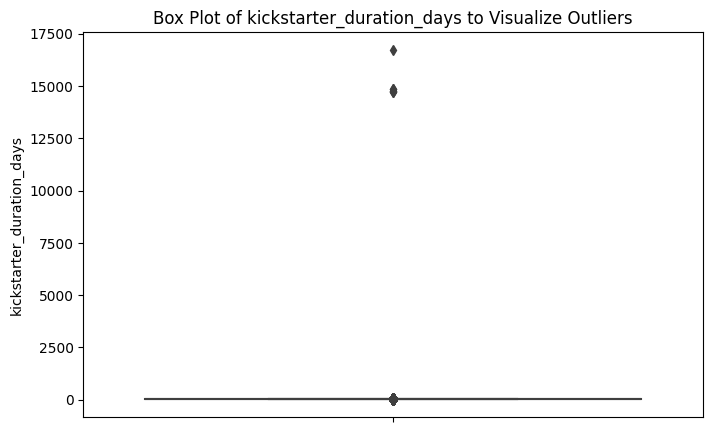

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['kickstarter_duration_days'])
plt.title(f'Box Plot of kickstarter_duration_days to Visualize Outliers')
plt.show()

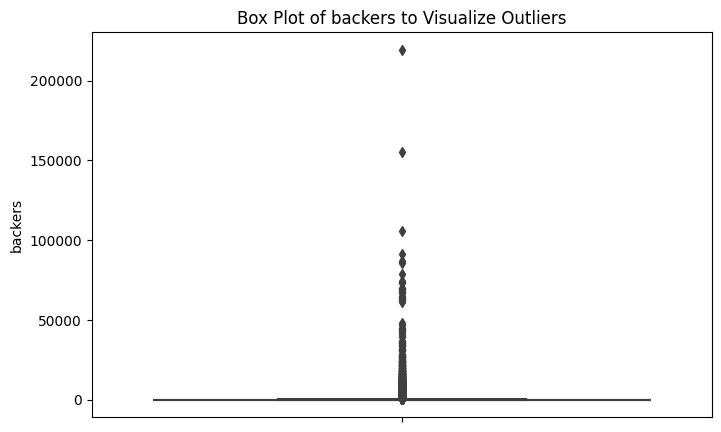

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['backers'])
plt.title(f'Box Plot of backers to Visualize Outliers')
plt.show()

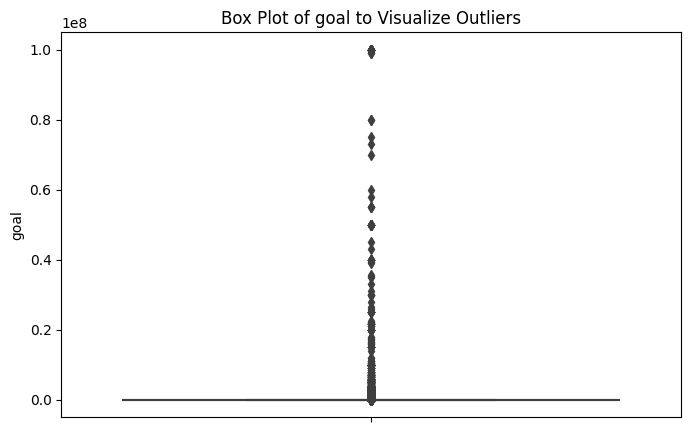

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['goal'])
plt.title(f'Box Plot of goal to Visualize Outliers')
plt.show()

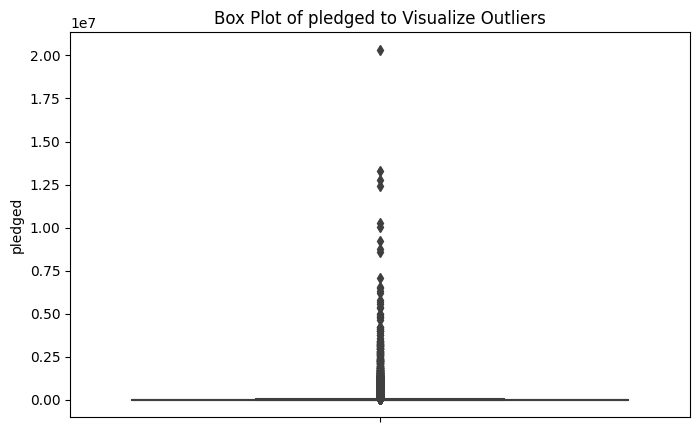

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['pledged'])
plt.title(f'Box Plot of pledged to Visualize Outliers')
plt.show()

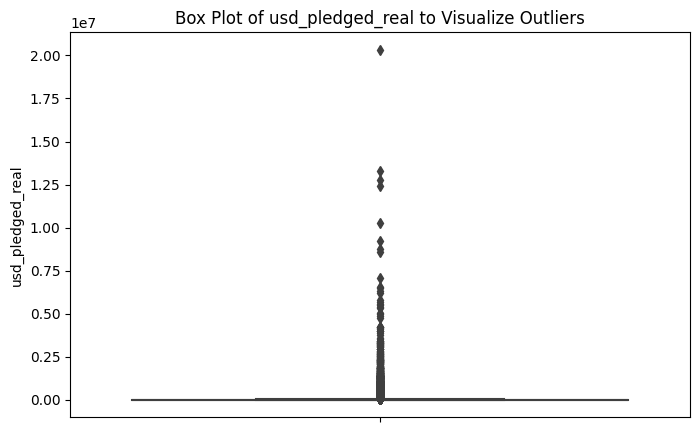

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df2['usd_pledged_real'])
plt.title(f'Box Plot of usd_pledged_real to Visualize Outliers')
plt.show()